In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Rescaling, Flatten, Dense, AveragePooling2D, MaxPooling2D, BatchNormalization, Dropout
from matplotlib import pyplot as plt
import pandas as pd
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint

2024-09-15 20:16:56.056552: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-15 20:16:56.218877: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-15 20:16:56.430786: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-15 20:16:56.574467: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-15 20:16:56.620779: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-15 20:16:56.941142: I tensorflow/core/platform/cpu_feature_gu

In [2]:
# Load the data
SEED = 1

train_ds = tf.keras.utils.image_dataset_from_directory(
    './archive/train',
    # subset = 'training',
    seed = SEED,
    image_size = (128, 128),
    batch_size = 32
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    './archive/test',
    # subset = 'validation',
    seed = SEED,
    image_size = (128, 128),
    batch_size = 32
)

Found 4733 files belonging to 2 classes.
Found 1184 files belonging to 2 classes.


In [3]:
# Several assisting functions

def show_best_metric(history, metrics):
    for metric in metrics:
        df_metric = pd.DataFrame(
        {
            metric: history.history[metric],
            f'val_{metric}': history.history[f'val_{metric}']
        }
        )
        display(df_metric[df_metric[f'val_{metric}'] == df_metric[f'val_{metric}'].max()])

def check_metrics(history, figure_names):
    for figure_name in figure_names:
        train = history.history[f'{figure_name}']
        val = history.history[f'val_{figure_name}']

        # Построение графика лосса и валидационного лосса
        epochs = range(1, len(train) + 1)
        plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')
        plt.plot(epochs, val, 'b', label=f'Validation {figure_name}')
        plt.title(f'Training and Validation {figure_name}')
        plt.xlabel('Epochs')
        plt.ylabel(f'{figure_name}')
        plt.legend()
        plt.show()

In [12]:
# Fully-connected neural network
def fcc_nn():
    
    model = Sequential()
    model.add(Flatten(input_shape = (128, 128, 3)))
    model.add(Rescaling(1./255))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [13]:
model_fcnn = fcc_nn()

model_fcnn.compile(
    optimizer = 'adam',
    loss='binary_crossentropy',
    metrics = ['accuracy', 'precision', 'auc']
    )

history_fcnn = model_fcnn.fit(train_ds, epochs = 20, validation_data = test_ds)

/home/timka999/Python projects/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.5616 - auc: 0.5821 - loss: 0.7711 - precision: 0.5213 - val_accuracy: 0.5405 - val_auc: 0.6234 - val_loss: 1.2835 - val_precision: 0.0000e+00
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.6450 - auc: 0.7035 - loss: 0.6365 - precision: 0.6134 - val_accuracy: 0.6030 - val_auc: 0.7551 - val_loss: 0.6418 - val_precision: 0.8033
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.6517 - auc: 0.7208 - loss: 0.6173 - precision: 0.6184 - val_accuracy: 0.5405 - val_auc: 0.6588 - val_loss: 0.7151 - val_precision: 0.5000
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.6629 - auc: 0.7390 - loss: 0.5961 - precision: 0.6441 - val_accuracy: 0.6056 - val_auc: 0.7847 - val_loss: 0.6461 - val_precision: 0.8969
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.7119 - auc: 0.7890 - loss: 0.5490 - precision: 0.7037 - val_accuracy: 0.7035 - val_auc: 0.7502 - val_los

/tmp/ipykernel_20517/2724043979.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')


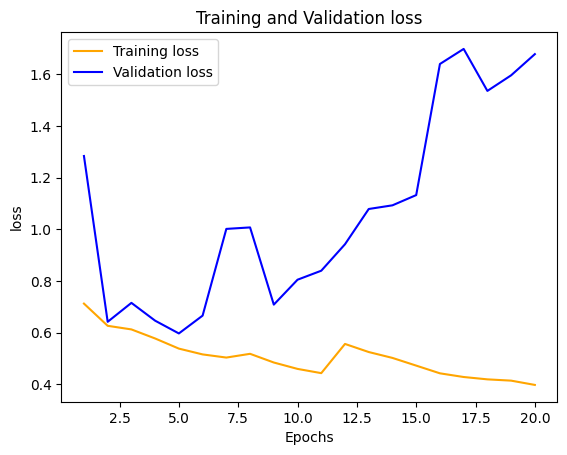

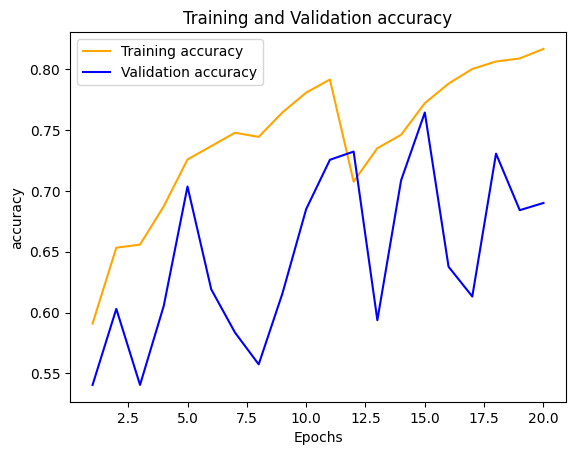

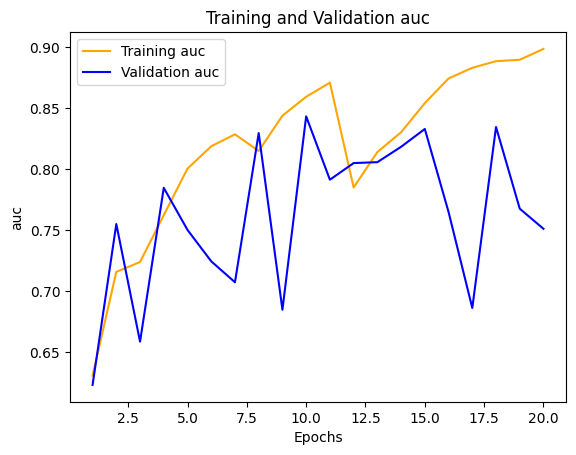

In [15]:
check_metrics(history_fcnn, ['loss', 'accuracy', 'auc'])

In [16]:
show_best_metric(history_fcnn, ['accuracy', 'auc'])

,accuracy,val_accuracy
14,0.772026,0.764358


,auc,val_auc
9,0.859193,0.843191


ИТОГ -- можно добиться accuracy на уровне 76% и auc на уровне 0,84 на 14 и 9 эпохах соответственно с помощью полносвязной нейросети.
Добавление Dropout и BatchNormalization помогло снизить переобучение, но с параметром 0,25 accuracy сильно осциллировало, поэтому я остановился на 0,1.

In [8]:
def conv_nn():
    model = Sequential()
    model.add(Rescaling(1./255))
    
    model.add(Conv2D(32, (4, 4), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size = (4, 4)))
    
    model.add(Conv2D(16, (2, 2), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    
    model.add(Dense(1, activation='sigmoid'))
    
    return(model)

In [24]:
model_conv_nn = conv_nn()

model_conv_nn.compile(
    optimizer = 'adam',
    loss='binary_crossentropy',
    metrics = ['accuracy', 'precision', 'auc']
    )

checkpoint_conv = ModelCheckpoint('best_model_conv.keras', monitor='accuracy', save_best_only=True, mode='max')

history_conv_nn = model_conv_nn.fit(train_ds, epochs = 10, validation_data = test_ds, callbacks=[checkpoint_conv])

Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 102s 609ms/step - accuracy: 0.5953 - auc: 0.6287 - loss: 0.6996 - precision: 0.5572 - val_accuracy: 0.8260 - val_auc: 0.8993 - val_loss: 0.4949 - val_precision: 0.7975
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 83s 560ms/step - accuracy: 0.7995 - auc: 0.8731 - loss: 0.4525 - precision: 0.7732 - val_accuracy: 0.7306 - val_auc: 0.9255 - val_loss: 0.5158 - val_precision: 0.9668
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 79s 535ms/step - accuracy: 0.8431 - auc: 0.9164 - loss: 0.3708 - precision: 0.8326 - val_accuracy: 0.8438 - val_auc: 0.9283 - val_loss: 0.3651 - val_precision: 0.7827
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 90s 605ms/step - accuracy: 0.8679 - auc: 0.9288 - loss: 0.3395 - precision: 0.8635 - val_accuracy: 0.8843 - val_auc: 0.9438 - val_loss: 0.3049 - val_precision: 0.8921
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 79s 533ms/step - accuracy: 0.8862 - auc: 0.9437 - loss: 0.3031 - precision: 0.8779 - val_accuracy: 0.8615 - val_auc: 0.9390 - val_l

/tmp/ipykernel_20517/2724043979.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')


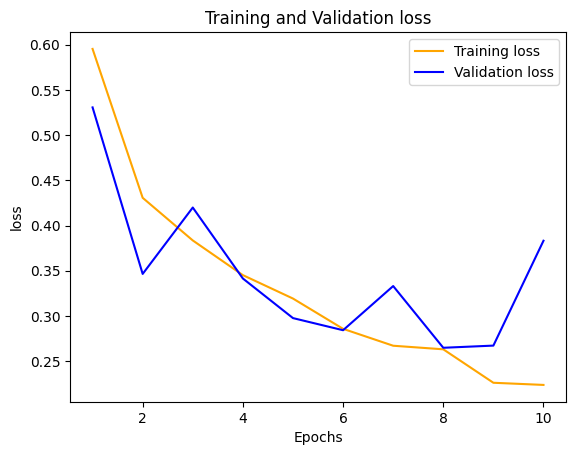

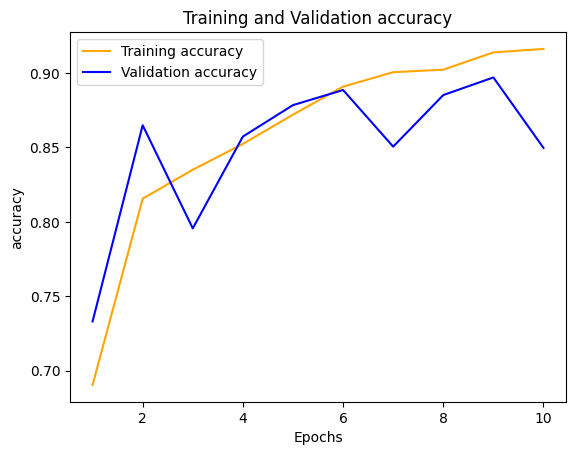

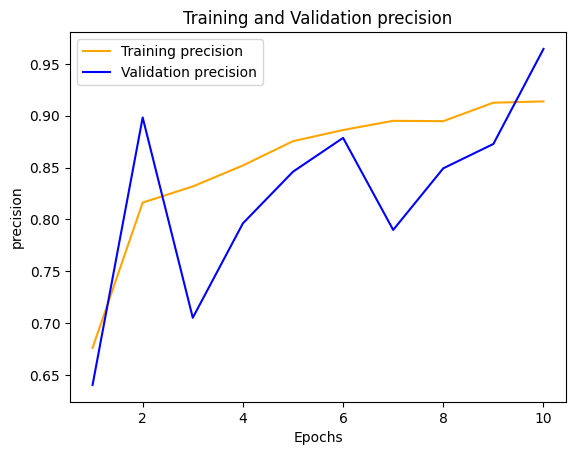

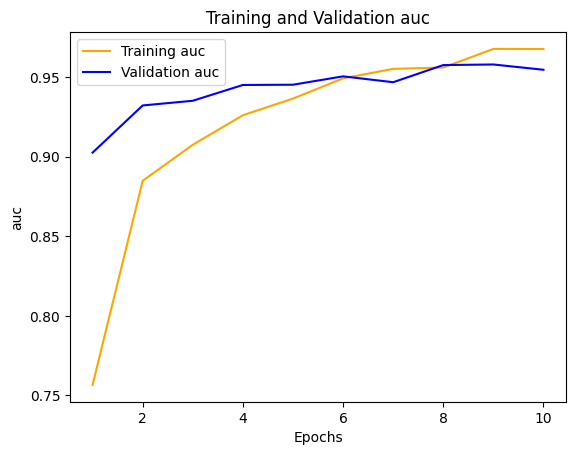

,accuracy,val_accuracy
8,0.913797,0.896959


,precision,val_precision
9,0.913833,0.964467


,auc,val_auc
8,0.96777,0.957992


In [10]:
check_metrics(history_conv_nn, ['loss', 'accuracy', 'precision', 'auc'])
show_best_metric(history_conv_nn, ['accuracy', 'precision', 'auc'])

ИТОГ -- можно добиться accuracy на уровне 90% и auc на уровне 0,96 на 8 эпохах с помощью свёрточной нейросети.
Здесь BatchNormalization и Dropout очень хорошо снизили переобучение и повысили accuracy на 4 п. п.
Попробуем теперь воспользоваться какой-нибудь известной архитектурой, например ResNet, обученной на ImageNet.

In [22]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in base_model.layers:
    layer.trainable = False

model_res = Sequential()
model_res.add(base_model)
model_res.add(Flatten())
model_res.add(Dense(32, activation = 'relu'))
model_res.add(Dense(1, activation = 'sigmoid'))

model_res.compile(
    optimizer = 'adam',
    loss='binary_crossentropy',
    metrics = ['accuracy', 'precision', 'auc']
    )

checkpoint = ModelCheckpoint('best_model.keras', monitor='accuracy', save_best_only=True, mode='max')

history_res = model_res.fit(train_ds, epochs = 5, validation_data = test_ds, callbacks=[checkpoint])

Epoch 1/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.9224 - auc: 0.9626 - loss: 0.2963 - precision: 0.9197 - val_accuracy: 0.9772 - val_auc: 0.9980 - val_loss: 0.0624 - val_precision: 0.9924
Epoch 2/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.9867 - auc: 0.9988 - loss: 0.0389 - precision: 0.9932 - val_accuracy: 0.9721 - val_auc: 0.9977 - val_loss: 0.0771 - val_precision: 0.9538
Epoch 3/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.9943 - auc: 0.9998 - loss: 0.0116 - precision: 0.9963 - val_accuracy: 0.9814 - val_auc: 0.9962 - val_loss: 0.0586 - val_precision: 0.9906
Epoch 4/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.9997 - auc: 1.0000 - loss: 0.0032 - precision: 1.0000 - val_accuracy: 0.9865 - val_auc: 0.9957 - val_loss: 0.0557 - val_precision: 0.9871
Epoch 5/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 1.0000 - auc: 1.0000 - loss: 0.0019 - precision: 1.0000 - val_accuracy: 0.9856 - val_auc: 0.9974 - val_loss: 0.0501 - va

/tmp/ipykernel_20517/2724043979.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')


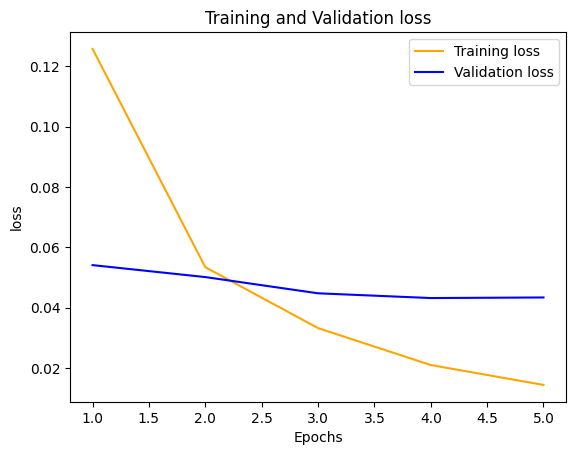

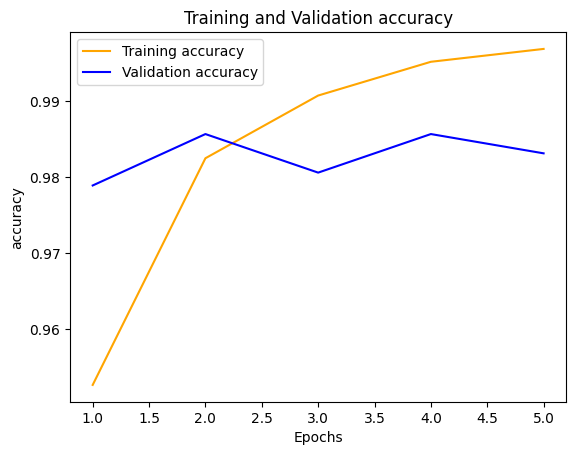

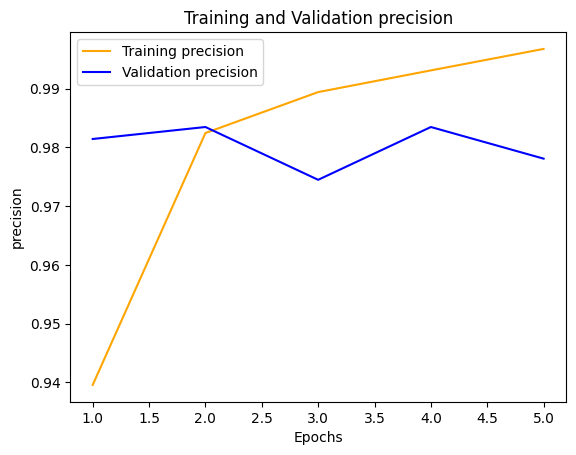

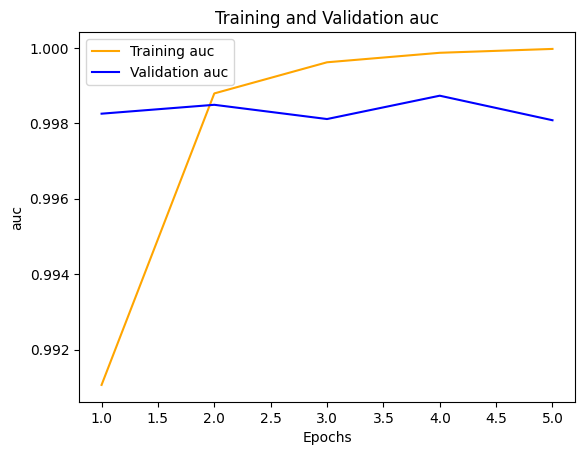

,accuracy,val_accuracy
1,0.982464,0.985642
3,0.995140,0.985642


,precision,val_precision
1,0.982464,0.983486
3,0.993122,0.983486


,auc,val_auc
3,0.99987,0.998732


In [20]:
check_metrics(history_res, ['loss', 'accuracy', 'precision', 'auc'])
show_best_metric(history_res, ['accuracy', 'precision', 'auc'])

ИТОГ -- очень хороший результат, accuracy 98,6%, uac 0,995.
Из минусов -- время обучения, но здесь видно, что 3-4 эпох достаточно.

Использование свёртки сильно увеличило точность, использование готовой архитектуры, обученной на большом количестве изображений помогло довести её до 98,6%

In [23]:
# Работа с лейблами и всякое такое

class_names = train_ds.class_names

# Вывод классов и их индексов
for index, class_name in enumerate(class_names):
    print(f'Класс {index}: {class_name}')

Класс 0: chihuahua
Класс 1: muffin
